<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [35]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import datetime

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [36]:
iowa_path = '../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

In [37]:
import datetime as datetime
imonth = iowa['Date']

In [38]:
#Creating a new column indicating the year 
iowa['year'] = pd.DatetimeIndex(iowa['Date']).year

In [39]:
#Calculating a new column indicating the month
iowa['month'] = pd.DatetimeIndex(iowa['Date']).month

In [40]:
#Creating a new dataframe for 2016
iowa16 = iowa[(iowa['year'] == 2016)]

In [42]:
#Creating a new dataframe for 2015
iowa15 = iowa[(iowa['year'] == 2015)]

In [43]:
#Exploring main dataset
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
year                     2

In [11]:
#Exploring dataset
iowa[0:1]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015,11


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [44]:
#Verifying the number of rows and columns in the dataset
iowa.shape

(270955, 20)

In [45]:
#Exploring the variables in the dataset
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
year                       int32
month                      int32
dtype: object


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [14]:
#There are 1077 blanks in the column "County name" & "County".
#The city "Dunlap" Zip code is incorrectly mentioned. It should be 7122 but instead it is 712-2
#There are 68 blanks in "Category" and "Category name"
#The Sales figures have been mentioned as objects, they need to be contracted to float





### 3.2 Clean the columns

In [46]:
#Dropping missing values in original dataset
iowa=iowa.dropna()

In [47]:
#Dropping missing values in dataframe for 2015
iowa15=iowa15.dropna()

In [48]:
#Dropping missing values in dataframe for 2016
iowa16=iowa16.dropna()

In [49]:
#Removing dollar sign from sales
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].str.replace('$','')

In [50]:
#Removing dollar sign from state bottle cost
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].str.replace('$','')

In [51]:
#Removing the dollar sign for state bottle retail
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].str.replace('$','')

In [52]:
#Converting state bottle cost to numeric value
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [53]:
#Converting sales into numeric value
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [54]:
#Converting state bottle retail to numeric value
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [55]:
#Correcting the zip code for dunlap
iowa['Zip Code'] = iowa['Zip Code'].str.replace('712-2','7122')

In [56]:
#Converting sales to numeric value
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [57]:
#Converting zip code to numeric value
iowa['Zip Code'] = iowa['Zip Code'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [58]:
#Verifying the formulas
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 20 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null int64
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
year                    

In [59]:
#Analyzing the dataset after dropping the blank values
iowa.shape

(269258, 20)


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [31]:
#Renaming the columns in the dataset
iowa.rename(columns={
    "State Bottle Cost": "State_Bottle_Cost",
    "State Bottle Retail":"State_Bottle_Retail",
    "Bottles Sold": "Bottles_Sold",
    "Sale (Dollars)":"Sales_(Dollars)",
    "Volume Sold (Liters)":"Volume_Sold_(Liters)",
    "Volume Sold (Gallons)":"Volume_Sold_(Gallons)",
    
    }, inplace=True)

In [75]:
#Creating a new dataframe for 2016
iowa16 = iowa[(iowa['year'] == 2016)]

In [76]:
#Creating a new dataframe for 2015
iowa15 = iowa[(iowa['year'] == 2015)]

In [61]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 20 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null int64
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
year                    

In [63]:
iowa.drop(['Vendor Number','County Number', 'Item Number'
          ],axis=1, inplace=True)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [64]:
#Creating dummy variables. The map function allows to plot particular values to an item in a column. The same code has also been
#used in various lecture files.
iowa['yeardummy'] = iowa.year.map({2015:1,2016:0})

#Source: https://www.youtube.com/watch?v=0s_1IsROgDc&t=160s

In [65]:
#Using the agg function to find out the maximum and minimum value for the months in the dataframe
st_15 = iowa15.groupby('Store Number')['month'].agg(['max','min'])

In [67]:
#The difference between the max and min value is calculated 
st_15['diff'] = st_15['max']-st_15['min'] + 1

In [68]:
#The figures below show whether the stores were open for the whole year. The number 12 shows that the stores were operating
#for full 12 months. The stores which are less than 12 were operating were not opering for the full year
st_15['diff']

Store Number
2106    12
2113    12
2130    12
2152    12
2178    12
2190    12
2191    12
2200    12
2205    12
2228    12
2233    12
2238    11
2248    12
2285    12
2290    12
2327    12
2353    12
2367     6
2413    12
2445    12
2448    12
2459    12
2460    12
2465    12
2475    12
2478    12
2487    11
2498    12
2500    12
2501    12
        ..
5180     4
5181     3
5182     4
5183     3
5185     3
5186     1
5187     3
5188     2
5189     1
5190     3
5191     1
5192     1
5193     1
5196     2
5198     2
5199     2
5201     1
5203     1
5204     2
5205     1
5206     1
5207     1
5212     1
5213     1
5215     1
9001    12
9002    12
9010     9
9013     7
9018     1
Name: diff, dtype: int32

In [ ]:
import pandas as pd

# 5.1 Calculate yearly liquor sales for each store in 2015

In [69]:
iowa15[0:1]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,2015,11


In [71]:
#Replacing the dollar sign
iowa15['Sale (Dollars)'] = iowa15['Sale (Dollars)'].str.replace('$','')

In [72]:
iowa15['Sale (Dollars)'] = iowa15['Sale (Dollars)'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [73]:
#We can see from the below table that the sales vary widely acorss the stores numbers.
iowa15.groupby(['Store Number'], sort=True)[['Sale (Dollars)']].sum().sort_values(by=['Sale (Dollars)'], ascending=False).reset_index()

,Store Number,Sale (Dollars)
0,2633,997924.42
1,4829,874664.18
2,3385,439584.35
3,2512,419534.61
4,3420,348837.36
5,3952,331874.38
6,3814,247417.42
7,3354,240153.72
8,3773,232066.78
9,2670,227060.96


### 5.2 Calculate the profit each store is making in 2015.


In [81]:
iowa['sys15'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost'])*(iowa['Bottles Sold'])

In [82]:
iowa15.groupby(['Store Number'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,Store Number,sys15
0,2633,12067.43
1,4829,11330.12
2,2190,7593.15
3,2512,7526.54
4,2648,7157.21
5,2666,6841.64
6,2603,6759.87
7,2515,6650.85
8,2572,6514.41
9,3773,6467.22


In [83]:
profitperstore = iowa15.groupby(['Store Number'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [85]:
#Profit on most profit per gallon
iowa15['pgal15'] = iowa15['sys15']/iowa15['Volume Sold (Gallons)']

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [201]:
iowa15[0:3]

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,...,Volume Sold (Liters),Volume Sold (Gallons),year,month,yeardummy,sys15,pgal15,New Category,salesdummy,aggregate
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,Mr. Boston Apricot Brandy,750,4.50,...,9.0,2.38,2015,11,1,2.25,0.945378,BRANDIES,1,NaN
4,08/18/2015,3654,BELMOND,50421,Wright,1031080.0,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,...,21.0,5.55,2015,8,1,3.60,0.648649,VODKA,1,NaN
5,04/20/2015,2569,CEDAR RAPIDS,52402,Linn,1041100.0,AMERICAN DRY GINS,New Amsterdam Gin,1750,13.32,...,10.5,2.77,2015,4,1,6.66,2.404332,GINS,1,NaN


In [205]:
#Total profits as per gallons
iowa15.groupby(['County'], sort=True)[['pgal15']].sum().sort_values(by=['pgal15'], ascending=False).reset_index()

,County,pgal15
0,Polk,324779.813801
1,Linn,144608.732451
2,Scott,99753.401816
3,Black Hawk,95644.232262
4,Johnson,74037.919184
5,Story,59593.376633
6,Woodbury,52461.750282
7,Pottawattamie,52338.340389
8,Dubuque,43511.111289
9,Cerro Gordo,36768.128709


In [203]:
#Total mean profits as per gallons
iowa15.groupby(['County'], sort=True)[['pgal15']].mean().sort_values(by=['pgal15'], ascending=False).reset_index()

,County,pgal15
0,Mitchell,12.105382
1,Taylor,11.121398
2,Emmet,11.053821
3,Monona,11.029633
4,Buena Vista,10.983691
5,Jones,10.874490
6,Adams,10.732379
7,Harrison,10.351704
8,Montgomery,10.257464
9,Mahaska,9.998781


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [91]:
iowa15[0:1]

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,yeardummy,sys15,pgal15
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,2015,11,1,2.25,0.945378


In [87]:
storesize = iowa15.groupby('Store Number').apply(lambda x :x['Volume Sold (Gallons)'].sum())

In [92]:
profitperstore = iowa15.groupby('Store Number').apply(lambda x :x['sys15'].sum())

In [93]:
#Calculating the ratio of profit to storesize
ratio = profitperstore/storesize

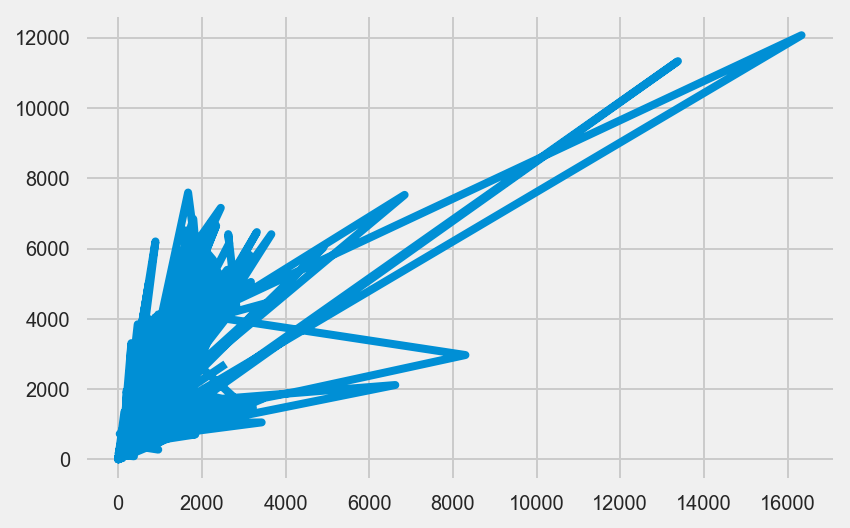

In [95]:
x = storesize
y = profitperstore

plt.plot(x,y)
plt.show()

We can see the above graph for the relationship between storesize and profit per store. It can be deduced that there is a positve relationship as it is logical to note that with an increase in sales volume the profit will also increase. The above graph does show a positive relationship.


### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [ ]:
iowa[0:3]

In [96]:
#Analyzing the the different types of liquor mentioned in the dataset
iowa['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [97]:
iowa['New Category'] = np.where(iowa['Category Name'].str.contains('BRANDIES') , "BRANDIES",np.where(iowa['Category Name'].str.contains('WHISKIES'), "WHISKIES", np.where(iowa['Category Name'].str.contains('SCHNAPPS'), "SCHNAPPS", np.where(iowa['Category Name'].str.contains('RUM'),"RUM",np.where(iowa['Category Name'].str.contains('VODKA'),"VODKA",np.where(iowa['Category Name'].str.contains('LIQUERS'),"LIQUERS",np.where(iowa['Category Name'].str.contains('GINS'),"GINS",np.where(iowa['Category Name'].str.contains('CACAO'),"CACAO",np.where(iowa['Category Name'].str.contains('AMARETTO'),"AMARETTO",np.where(iowa['Category Name'].str.contains('SPIRITS'),"SPIRITS",np.where(iowa['Category Name'].str.contains('DECANTERS'),"DECANTERS","MISC")))))))))))

In [98]:
#Creating the broader classification fields for the types of items in the dataset
iowa15['New Category'] = np.where(iowa15['Category Name'].str.contains('BRANDIES') , "BRANDIES",np.where(iowa15['Category Name'].str.contains('WHISKIES'), "WHISKIES", np.where(iowa15['Category Name'].str.contains('SCHNAPPS'), "SCHNAPPS", np.where(iowa15['Category Name'].str.contains('RUM'),"RUM",np.where(iowa15['Category Name'].str.contains('VODKA'),"VODKA",np.where(iowa15['Category Name'].str.contains('LIQUERS'),"LIQUERS",np.where(iowa15['Category Name'].str.contains('GINS'),"GINS",np.where(iowa15['Category Name'].str.contains('CACAO'),"CACAO",np.where(iowa15['Category Name'].str.contains('AMARETTO'),"AMARETTO",np.where(iowa15['Category Name'].str.contains('SPIRITS'),"SPIRITS",np.where(iowa15['Category Name'].str.contains('DECANTERS'),"DECANTERS","MISC")))))))))))

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [99]:
##Creating the broader classification fields for the types of items in the dataset
iowa15.groupby(['New Category']).count()['Category Name'].reset_index()

,New Category,Category Name
0,AMARETTO,1321
1,BRANDIES,12124
2,CACAO,283
3,DECANTERS,1060
4,GINS,8143
5,MISC,42761
6,RUM,26529
7,SCHNAPPS,11494
8,SPIRITS,1166
9,VODKA,56517


### 5.6 Do relationships exist between the broader liquor type and profit?

In [100]:
#Correlation between broader liquor type and profit.
iowa15.groupby('New Category').apply(lambda x :x['sys15'].sum())

New Category
AMARETTO       4073.62
BRANDIES      50208.02
CACAO           665.96
DECANTERS      7565.54
GINS          35487.27
MISC         261820.26
RUM          117437.32
SCHNAPPS      42752.27
SPIRITS        5942.81
VODKA        227912.28
WHISKIES     316094.47
dtype: float64

In [105]:
iowa15.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,316094.47
1,MISC,261820.26
2,VODKA,227912.28
3,RUM,117437.32
4,BRANDIES,50208.02
5,SCHNAPPS,42752.27
6,GINS,35487.27
7,DECANTERS,7565.54
8,SPIRITS,5942.81
9,AMARETTO,4073.62


We can see from the above table that whiskies are the most profitable item and cacao the least profitable item.


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [103]:
#Calculating sales per liquor brand
iowa15.groupby(['Item Description'], sort=True)[['Sale (Dollars)']].sum().sort_values(by=['Sale (Dollars)'], ascending=False).reset_index()

,Item Description,Sale (Dollars)
0,Black Velvet,1278393.63
1,Jack Daniels Old #7 Black Lbl,978278.14
2,Captain Morgan Spiced Rum,958325.12
3,Fireball Cinnamon Whiskey,734351.90
4,Crown Royal Canadian Whisky,657268.92
5,Hawkeye Vodka,571135.54
6,Absolut Swedish Vodka 80 Prf,552276.47
7,Grey Goose Vodka,496630.22
8,Jagermeister Liqueur,392707.10
9,Bacardi Superior Rum,383554.92


From the graph above we can see that Black Velvet has the highest sales, therefore we can say that the there are noticable relationship between liquor brand and sales.

In [104]:
#Calculating sales per liquor brand
iowa15.groupby(['Item Description'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,Item Description,sys15
0,Jack Daniels Old #7 Black Lbl,21983.14
1,Black Velvet,19504.07
2,Fireball Cinnamon Whiskey Mini Dispenser,17757.70
3,Crown Royal Canadian Whisky,16309.48
4,Captain Morgan Spiced Rum,15731.22
5,Grey Goose Vodka,15650.53
6,Absolut Swedish Vodka 80 Prf,15333.00
7,Fireball Cinnamon Whiskey,13463.73
8,Hawkeye Vodka,12942.86
9,Jim Beam,12047.11


It can be seen from the table above that Jack Daniels is the most profitable brand.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [106]:
#Trying to find out the amount of sales per store
iowa15.groupby(['Store Number'], sort=True)[['Sale (Dollars)']].sum().sort_values(by=['Sale (Dollars)'], ascending=False).reset_index()


,Store Number,Sale (Dollars)
0,2633,997924.42
1,4829,874664.18
2,3385,439584.35
3,2512,419534.61
4,3420,348837.36
5,3952,331874.38
6,3814,247417.42
7,3354,240153.72
8,3773,232066.78
9,2670,227060.96


In [118]:
cum_sales_by_store_number = iowa15.groupby('Store Number')['Sale (Dollars)'].agg(np.sum)
cum_sales_by_store_number = pd.DataFrame(cum_sales_by_store_number)
iowa15['aggregate'] = cum_sales_by_store_number

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [119]:
iowa15[0:3]

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,...,Volume Sold (Liters),Volume Sold (Gallons),year,month,yeardummy,sys15,pgal15,New Category,salesdummy,aggregate
0,11/04/2015,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,Mr. Boston Apricot Brandy,750,4.50,...,9.0,2.38,2015,11,1,2.25,0.945378,BRANDIES,1,NaN
4,08/18/2015,3654,BELMOND,50421,Wright,1031080.0,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,...,21.0,5.55,2015,8,1,3.60,0.648649,VODKA,1,NaN
5,04/20/2015,2569,CEDAR RAPIDS,52402,Linn,1041100.0,AMERICAN DRY GINS,New Amsterdam Gin,1750,13.32,...,10.5,2.77,2015,4,1,6.66,2.404332,GINS,1,NaN


We should pass a progressive tax which is dependent on the volume of sales of the company. This way we would be able to protect the small stores. However, it is also possible to levy a higher tax on more profitable categories of liquior. For example, as whisky is the most profitable, the tax on it should be higher than the one on beer.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [143]:
#Creating new variable for 1 quarter 2015
iowa1q15 = iowa15[(iowa15['month'] == 1) |(iowa15['month'] == 2) |(iowa15['month'] == 3)]

In [144]:
# Creating new variable for 1 quarter 2016
iowa1q16 =iowa16[(iowa16['month'] == 1) |(iowa16['month'] == 2) |(iowa16['month'] == 3)]

In [145]:
iowa1q15.dropna(how='any').shape

(286, 23)

In [146]:
iowa1q15.dropna(how='any').shape

(286, 23)

In [147]:
#Converting to numeric
iowa15['Sale (Dollars)'] = iowa15['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa1q16['Sale (Dollars)'] = iowa1q16['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa1q15['Sale (Dollars)'] = iowa1q15['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa1q16['Sale (Dollars)'] = iowa1q16['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa1q15['Sale (Dollars)'] = iowa1q15['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa1q16['Sale (Dollars)'] = iowa1q16['Sale (Dollars)'].convert_objects(convert_numeric=True)

C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific c

In [148]:
merged = iowa1q15.append(iowa1q16, ignore_index=True)

In [149]:
#Creatibng the two columns for 2015 and 2016
FirstQ15=iowa1q15.groupby(['County'], sort=True)[['Sale (Dollars)']].sum().sort_values(by=['Sale (Dollars)'], ascending=False).reset_index()
FirstQ15.rename(columns={
        'Sale (Dollars)':'Q1_Sales_15'
    }, inplace=True) 
First

FirstQ16=iowa1q16.groupby(['County'], sort=True)[['Sale (Dollars)']].sum().sort_values(by=['Sale (Dollars)'], ascending=False).reset_index()
FirstQ16.rename(columns={
        'Sale (Dollars)':'Q1_Sales_16'
    }, inplace=True) 
First

onetwo=pd.merge(FirstQ15,FirstQ16,on=['County'],how='right')
onetwo

,County,Q1_Sales_15,Q1_Sales_16
0,Polk,1337581.28,1360497.46
1,Linn,574464.38,539495.48
2,Scott,418415.27,416191.64
3,Black Hawk,340867.08,346836.40
4,Johnson,322143.10,359432.36
5,Pottawattamie,232538.02,264784.42
6,Woodbury,230724.79,249186.97
7,Story,203131.69,186431.72
8,Dubuque,190977.13,189868.27
9,Cerro Gordo,111299.13,125052.92


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [157]:
#Sales for 1 Q 15
pcity15 = iowa1q15.groupby('County').apply(lambda x :x['Sale (Dollars)'].sum())

In [158]:
#Sales for 1 Q 16
pcity16 = iowa1q16.groupby('County').apply(lambda x :x['Sale (Dollars)'].sum())

In [167]:
#Calculating the percentage difference in sales
((pcity16 - pcity15)/(pcity15)*100)

County
Adair            15.408139
Adams            -2.530618
Allamakee        27.995409
Appanoose        40.505014
Audubon         -41.454793
Benton           -1.085568
Black Hawk        1.751216
Boone           -18.940559
Bremer           -8.537152
Buchanan        -22.288752
Buena Vista      -2.951532
Butler           82.837679
Calhoun          39.300185
Carroll         -34.673975
Cass             33.732837
Cedar            99.407459
Cerro Gordo      12.357500
Cherokee          0.649725
Chickasaw       -49.545759
Clarke           -2.148507
Clay              1.436338
Clayton         -12.931170
Clinton           3.717676
Crawford         78.196338
Dallas           19.300672
Davis            -5.341031
Decatur          38.512197
Delaware         35.426217
Des Moines      -14.358250
Dickinson       -11.299452
                   ...    
Muscatine         2.664195
O'Brien         -21.693808
Osceola         -18.923457
Page            -31.635251
Palo Alto         3.457110
Plymouth         10.6

None


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

I would recommend that the owener opens the store in Pottawattamie. It is a among the top 5 counties and with a strong growth rate of 14% 1Q16 vis a vis 1Q15. The other counties at the top of the list do have high sales but their sales volume have been declining or there is a modest increase.

He should open the stores in locations where is a increase in volume sales and profitability. It can be seen from the statistics that Pottawattamie would be a good location to start a liquor store as it would there has been a 32,326 gallons of sales increase from 1q15 to 1q16.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

We have already seen earlier that whiskey is the most proftable business and therefore the owner should sell it to maximize profit. 

In [187]:
iowa15.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,316094.47
1,MISC,261820.26
2,VODKA,227912.28
3,RUM,117437.32
4,BRANDIES,50208.02
5,SCHNAPPS,42752.27
6,GINS,35487.27
7,DECANTERS,7565.54
8,SPIRITS,5942.81
9,AMARETTO,4073.62


In [192]:
#Creating a dataset for County Polk to compare the profitability with Pottawatt
polk = iowa15[(iowa15['County'] == "Polk")] 

In [194]:
#Examining the profitability of Polk
polk.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,55841.52
1,MISC,53918.23
2,VODKA,47089.49
3,RUM,19187.71
4,BRANDIES,11025.07
5,GINS,6850.35
6,SCHNAPPS,4533.16
7,SPIRITS,1207.56
8,DECANTERS,1104.03
9,AMARETTO,652.45


In [195]:
#Creating a dataset for County Polk to compare the profitability with Pottawattamie
Linn = iowa15[(iowa15['County'] == "Linn")] 

In [196]:
#Examining the profitability by group at Polk. It seems that whiskies are the most porfitable.
Linn.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,24224.00
1,MISC,22740.79
2,VODKA,21372.77
3,RUM,9509.98
4,BRANDIES,5531.50
5,SCHNAPPS,3422.34
6,GINS,3089.48
7,SPIRITS,541.19
8,DECANTERS,361.88
9,AMARETTO,278.93


In [197]:
#Creating a dataset for County Polk to compare the profitability with Pottawattamie
Scott = iowa15[(iowa15['County'] == "Scott")] 

In [198]:
#Profitability of county Scott with regard to the category. Whiskies are again the most profitable
Scott.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,17219.35
1,MISC,16863.49
2,VODKA,14187.89
3,RUM,6118.09
4,BRANDIES,4371.08
5,SCHNAPPS,2632.42
6,GINS,2492.19
7,SPIRITS,378.37
8,DECANTERS,331.03
9,AMARETTO,243.32


In [199]:
#Creating a dataset for  Pottawattamie
Pottawattamie = iowa15[(iowa15['County'] == "Pottawattamie")] 

In [200]:
Pottawattamie.groupby(['New Category'], sort=True)[['sys15']].sum().sort_values(by=['sys15'], ascending=False).reset_index()

,New Category,sys15
0,WHISKIES,10728.98
1,MISC,8765.78
2,VODKA,6724.07
3,RUM,3681.66
4,SCHNAPPS,1781.27
5,BRANDIES,1328.77
6,GINS,892.68
7,SPIRITS,182.94
8,DECANTERS,169.04
9,AMARETTO,150.43


It can be seen from the statistics above that in the leading counties, whiskies remain the most profitable liquor. Therefore, the location will not change if the owners wants to only sell one type of liquor as it is the top category.